In [33]:
def calculateB(x, y, n):
    
    sx = sum(x)
 
    sy = sum(y)
     
    sxsy = 0
 
    sx2 = 0
    for i in range(n):
     sxsy += x[i] * y[i]
     sx2 += x[i] * x[i]
    b = (n * sxsy - sx * sy)/(n * sx2 - sx * sx)
    return b
 
def leastRegLine(X,Y,n):
     
    # Finding b 
    b = calculateB(X, Y, n)
    meanX = int(sum(X)/n)
    meanY = int(sum(Y)/n)
 
    a = meanY - b * meanX
  
    print("Regression line:")
    print("Y = ", '%.3f'%a, " + ", '%.3f'%b, "*X", sep=" ")
    
X = [95, 85, 80, 70, 60 ]
Y = [90, 80, 70, 65, 60 ]
n = len(X)
leastRegLine(X, Y, n)

Regression line:
Y =  5.685  +  0.863 *X


Regression line:
Y = 5.685 + 0.863*X


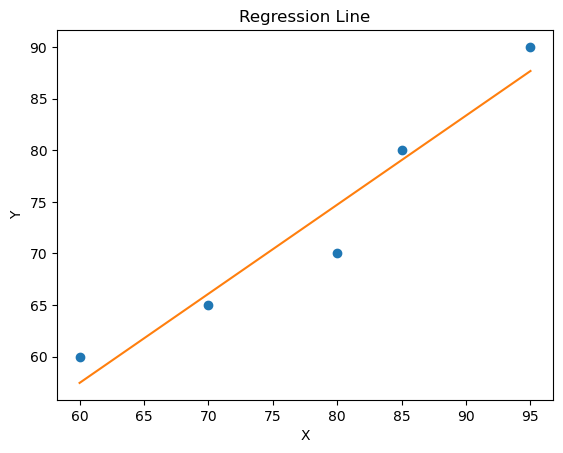

Enter a value for x:  5


Predicted y for x = 5.00 is 10.00


In [52]:
import matplotlib.pyplot as plt
import numpy as np

def calculateB(x, y, n):
    sx = sum(x)
    sy = sum(y)
    sxsy = 0
    sx2 = 0
    for i in range(n):
        sxsy += x[i] * y[i]
        sx2 += x[i] * x[i]
    b = (n * sxsy - sx * sy)/(n * sx2 - sx * sx)
    return b

def leastRegLine(X,Y,n):
    # Finding b
    b = calculateB(X, Y, n)
    meanX = sum(X)/n
    meanY = sum(Y)/n

    a = meanY - b * meanX
    print("Regression line:")
    print("Y = {:.3f} + {:.3f}*X".format(a, b))

    # Plotting the regression line
    x_line = np.linspace(min(X), max(X), 100)
    y_line = a + b * x_line
    plt.plot(X, Y, 'o')
    plt.plot(x_line, y_line)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regression Line')
    plt.grid(True)
    plt.show()

    # Predicting y for a given x
    x_input = float(input("Enter a value for x: "))
    y_predicted = a + b * x_input
    print("Predicted y for x = {:.2f} is {:.2f}".format(x_input, y_predicted))

X = [95, 85, 80, 70, 60 ]
Y = [90, 80, 70, 65, 60 ]
n = len(X)
leastRegLine(X, Y, n)


Epoch 0, Cost: 0.4438768101905608
Epoch 100, Cost: 0.41825923852681623
Epoch 200, Cost: 0.41038308748171753
Epoch 300, Cost: 0.6001118608962089
Epoch 400, Cost: 0.4331718184069414
Epoch 500, Cost: 0.45374497488287846
Epoch 600, Cost: 0.4263896125380277
Epoch 700, Cost: 0.47383384050706523
Epoch 800, Cost: 0.4462145844753125
Epoch 900, Cost: 0.7910754732627016
Final parameters (theta): [[3.98009213]
 [2.96688391]]


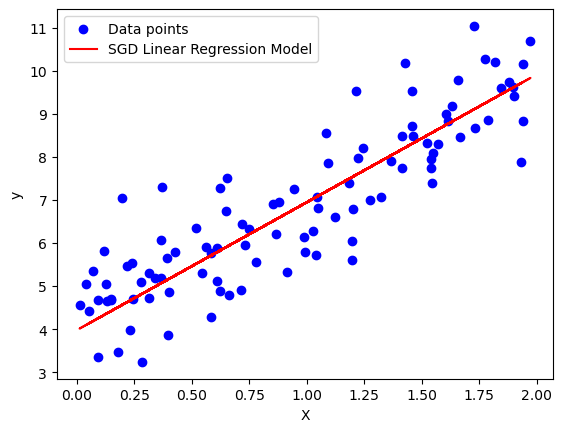

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points, X values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3 * X + noise

# Add a bias term (X_0 = 1) to the input matrix
X_b = np.c_[np.ones((100, 1)), X]  # Add the intercept term

# Initialize weights (parameters)
theta = np.random.randn(2, 1)  # Random initialization of the weights (2 parameters: bias and slope)

# Hyperparameters
learning_rate = 0.1
n_epochs = 1000  # Number of iterations (epochs)
m = len(X_b)  # Number of data points

# Stochastic Gradient Descent (SGD)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)  # Select a random sample
        xi = X_b[random_index:random_index+1]  # Select one training example
        yi = y[random_index:random_index+1]  # Corresponding target value
        
        # Compute the prediction
        prediction = xi.dot(theta)
        
        # Compute the error (gradient)
        error = prediction - yi
        
        # Update the parameters (weights)
        gradient = xi.T.dot(error)  # Compute the gradient
        theta -= learning_rate * gradient  # Update the weights

    # Print the cost function value every 100 epochs (optional)
    if epoch % 100 == 0:
        cost = np.sum((X_b.dot(theta) - y) ** 2) / (2 * m)  # Mean Squared Error cost function
        print(f"Epoch {epoch}, Cost: {cost}")

# Final parameters after training
print("Final parameters (theta):", theta)

# Plotting the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_b.dot(theta), color='red', label='SGD Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Coefficients (weights): [ 0.19109195 -0.19109195  0.38218391]
Intercept: 5.170977011494256
R-squared: 0.9504759912508624
Mean Squared Error: 1.0028611771700384


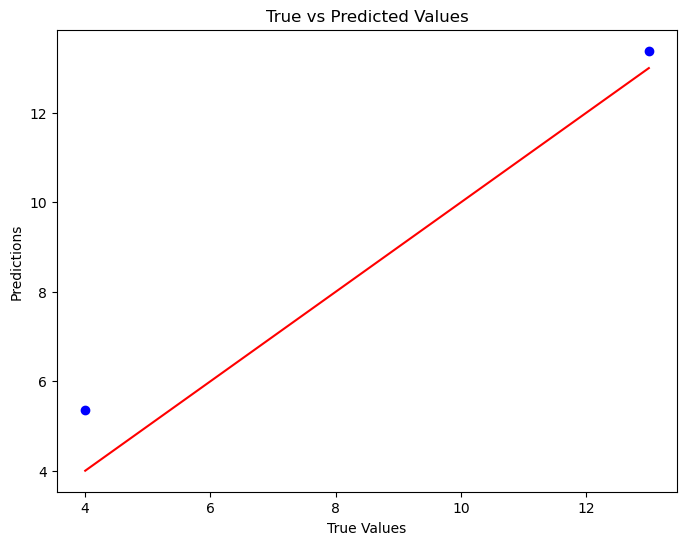

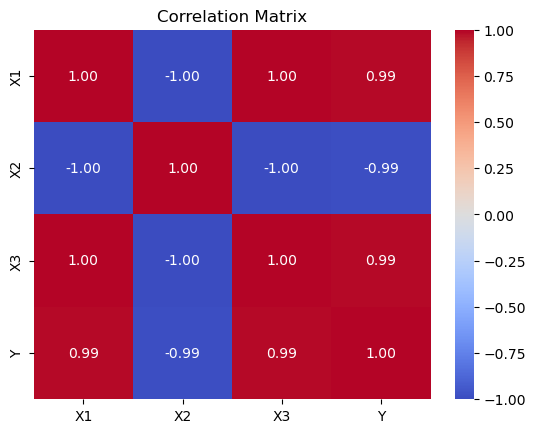

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset: Replace this with your dataset
# Here, we're creating a sample dataset with 3 features (X1, X2, X3) and 1 target (Y)
data = {
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'X3': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Y': [5, 4, 6, 7, 9, 10, 11, 12, 13, 15]
}
df = pd.DataFrame(data)

# Define independent variables (features) and dependent variable (target)
X = df[['X1', 'X2', 'X3']]  # Independent variables (features)
Y = df['Y']  # Dependent variable (target)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, Y_train)

# Predict the target values using the test data
Y_pred = model.predict(X_test)

# Print the model's coefficients (weights) and intercept
print("Coefficients (weights):", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model's performance using R^2 and Mean Squared Error
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Visualize the True vs Predicted values (for better interpretation)
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  # Ideal line
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

# Optional: Visualize the correlation matrix for the features
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()